# Analyse der generierten Pressemitteilungen

Dieses Notebook dient der Analyse der mit dem Teuken-Modell generierten Pressemitteilungen. Wir vergleichen die generierten Texte mit den Original-Pressemitteilungen und untersuchen verschiedene Aspekte wie Länge, Struktur und Qualität.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Setze den Stil für bessere Visualisierungen
plt.style.use('ggplot')
sns.set_palette("husl")

# Konfiguriere die Anzeige von Pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

## 1. Daten laden und vorbereiten

In [4]:
# Lade die generierten Pressemitteilungen
generated_df = pd.read_csv('../data/generation/teuken-7b_results.csv')

# Lade den Original-Datensatz für den Vergleich
original_df = pd.read_csv('../data/processed/cases_prs_synth_prompts_subset.csv')

# Zeige die ersten Zeilen
print("Generierte Pressemitteilungen:")
display(generated_df.head())
print("\nOriginal-Datensatz:")
display(original_df.head())

Generierte Pressemitteilungen:


,id,date,summary,judgement,subset_name,split_name,is_announcement_rule,matching_criteria,synthetic_prompt,generated_pr_teuken
0,bverwg_2021-44,25.06.2021,Pressemitteilung Nr. 44/2021 vom 25.06.2021\n...,27.07.2021 · IWW-Abrufnummer 223706\nBundesver...,Bundesverwaltungsgericht,test,False,NaN,Erstelle eine Pressemitteilung zum folgenden G...,Erstelle eine Pressemitteilung zum folgenden G...
1,bverwg_2021-46,07.07.2021,Pressemitteilung Nr. 46/2021 vom 07.07.2021\...,Urteil vom 07.07.2021 - BVerwG 2 C 2.21ECLI:DE...,Bundesverwaltungsgericht,test,False,NaN,Erstelle eine prägnante Pressemitteilung zum b...,Erstelle eine prägnante Pressemitteilung zum b...
2,bverwg_2021-47,07.07.2021,Pressemitteilung Nr. 47/2021 vom 07.07.2021\...,Urteil vom 07.07.2021 - BVerwG 8 C 28.20ECLI:D...,Bundesverwaltungsgericht,test,False,NaN,Verfasse eine prägnante Pressemitteilung zum B...,Verfasse eine prägnante Pressemitteilung zum B...
3,bverwg_2021-48,08.07.2021,Pressemitteilung Nr. 48/2021 vom 08.07.2021\n...,Urteil vom 08.07.2021 - BVerwG 6 A 10.20ECLI:D...,Bundesverwaltungsgericht,test,False,NaN,Erstelle aus folgendem Gerichtsurteil eine off...,Erstelle aus folgendem Gerichtsurteil eine off...
4,bverwg_2021-49,27.07.2021,Pressemitteilung Nr. 49/2021 vom 27.07.2021\n...,Urteil vom 27.07.2021 - BVerwG 4 A 14.19ECLI:D...,Bundesverwaltungsgericht,test,False,NaN,"Erstelle eine kurze, allgemeinverständliche Pr...","Erstelle eine kurze, allgemeinverständliche Pr..."



Original-Datensatz:


,id,date,summary,judgement,subset_name,split_name,is_announcement_rule,matching_criteria,synthetic_prompt
0,bverwg_2021-44,25.06.2021,Pressemitteilung Nr. 44/2021 vom 25.06.2021\n...,27.07.2021 · IWW-Abrufnummer 223706\nBundesver...,Bundesverwaltungsgericht,test,False,NaN,Erstelle eine Pressemitteilung zum folgenden G...
1,bverwg_2021-46,07.07.2021,Pressemitteilung Nr. 46/2021 vom 07.07.2021\...,Urteil vom 07.07.2021 - BVerwG 2 C 2.21ECLI:DE...,Bundesverwaltungsgericht,test,False,NaN,Erstelle eine prägnante Pressemitteilung zum b...
2,bverwg_2021-47,07.07.2021,Pressemitteilung Nr. 47/2021 vom 07.07.2021\...,Urteil vom 07.07.2021 - BVerwG 8 C 28.20ECLI:D...,Bundesverwaltungsgericht,test,False,NaN,Verfasse eine prägnante Pressemitteilung zum B...
3,bverwg_2021-48,08.07.2021,Pressemitteilung Nr. 48/2021 vom 08.07.2021\n...,Urteil vom 08.07.2021 - BVerwG 6 A 10.20ECLI:D...,Bundesverwaltungsgericht,test,False,NaN,Erstelle aus folgendem Gerichtsurteil eine off...
4,bverwg_2021-49,27.07.2021,Pressemitteilung Nr. 49/2021 vom 27.07.2021\n...,Urteil vom 27.07.2021 - BVerwG 4 A 14.19ECLI:D...,Bundesverwaltungsgericht,test,False,NaN,"Erstelle eine kurze, allgemeinverständliche Pr..."


## 2. Grundlegende Statistiken

In [5]:
def calculate_text_stats(text):
    """Berechnet grundlegende Statistiken für einen Text."""
    if pd.isna(text):
        return pd.Series({'length': 0, 'words': 0, 'sentences': 0})
    
    # Berechne Länge in Zeichen
    length = len(str(text))
    
    # Berechne Anzahl der Wörter
    words = len(str(text).split())
    
    # Berechne Anzahl der Sätze (einfache Approximation)
    sentences = len([s for s in str(text).split('.') if s.strip()])
    
    return pd.Series({'length': length, 'words': words, 'sentences': sentences})

# Berechne Statistiken für beide Datensätze
generated_stats = generated_df['generated_pr_teuken'].apply(calculate_text_stats)
original_stats = original_df['summary'].apply(calculate_text_stats)

# Zeige Zusammenfassung
print("Statistiken für generierte Pressemitteilungen:")
display(generated_stats.describe())
print("\nStatistiken für Original-Pressemitteilungen:")
display(original_stats.describe())

Statistiken für generierte Pressemitteilungen:


,length,words,sentences
count,100.000000,100.000000,100.00000
mean,3554.910000,433.860000,50.95000
std,1341.209066,118.893639,16.31655
min,1822.000000,238.000000,24.00000
25%,2574.500000,315.250000,38.00000
50%,3395.500000,453.500000,50.00000
75%,4154.750000,539.000000,59.50000
max,9263.000000,656.000000,115.00000



Statistiken für Original-Pressemitteilungen:


,length,words,sentences
count,100.000000,100.000000,100.000000
mean,3507.030000,455.500000,34.580000
std,1206.778251,156.574989,12.493376
min,1131.000000,159.000000,10.000000
25%,2775.000000,354.250000,27.000000
50%,3528.000000,459.000000,32.000000
75%,3924.750000,522.250000,38.250000
max,10380.000000,1293.000000,99.000000


## 3. Visualisierung der Textlängen

/tmp/ipykernel_196117/2113801119.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Generiert', 'Original'])


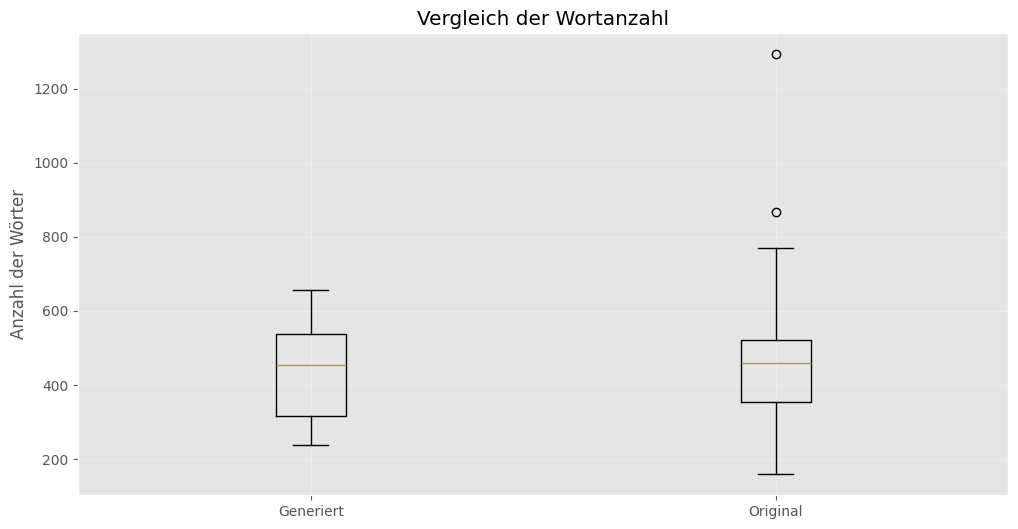

In [6]:
plt.figure(figsize=(12, 6))

# Erstelle Boxplots für beide Datensätze
data = [generated_stats['words'], original_stats['words']]
plt.boxplot(data, labels=['Generiert', 'Original'])

plt.title('Vergleich der Wortanzahl')
plt.ylabel('Anzahl der Wörter')
plt.grid(True, alpha=0.3)

plt.show()

## 4. Qualitative Analyse

In [7]:
def display_comparison(idx):
    """Zeigt einen Vergleich zwischen generierter und Original-Pressemitteilung."""
    print(f"\nVergleich für Eintrag {idx}:")
    print("\nGenerierte Pressemitteilung:")
    print(generated_df.iloc[idx]['generated_pr_teuken'])
    print("\nOriginal-Pressemitteilung:")
    print(original_df.iloc[idx]['summary'])
    print("\n" + "="*80)

# Zeige einige Beispiele
for idx in range(min(3, len(generated_df))):
    display_comparison(idx)


Vergleich für Eintrag 0:

Generierte Pressemitteilung:
Erstelle eine Pressemitteilung zum folgenden Gerichtsurteil des Bundesverwaltungsgerichts. Die Pressemitteilung soll:

1. Eine prägnante Überschrift haben, die das Kernthema der Entscheidung zusammenfasst
2. In den ersten beiden Absätzen die zentrale rechtliche Feststellung und die Kernaussage des Urteils verständlich zusammenfassen
3. Den Sachverhalt kurz und klar darstellen, einschließlich der Vorgeschichte und des Verfahrensgangs
4. Die wichtigsten rechtlichen Erwägungen des Gerichts in allgemeinverständlicher Sprache erläutern, ohne zu viele juristische Fachbegriffe
5. Die praktischen Auswirkungen der Entscheidung für ähnliche Fälle andeuten
6. Am Ende die Aktenzeichen und Daten des Verfahrens sowie der Vorinstanzen nennen

Die Pressemitteilung soll einen sachlichen, neutralen Ton wahren und etwa 300-500 Wörter umfassen. Richte dich an ein allgemeines Publikum mit Interesse an Rechtsfragen, aber ohne spezifische juristische Vo

## 5. Strukturanalyse

In [8]:
def analyze_structure(text):
    """Analysiert die Struktur eines Textes."""
    if pd.isna(text):
        return pd.Series({
            'has_date': False,
            'has_location': False,
            'has_quotes': False,
            'starts_with_date': False
        })
    
    text = str(text)
    
    # Prüfe auf Datum (einfache Approximation)
    has_date = any(char.isdigit() for char in text[:50])
    
    # Prüfe auf Ortsangaben (einfache Approximation)
    has_location = any(word in text.lower() for word in ['stadt', 'land', 'bundesland', 'gericht'])
    
    # Prüfe auf Anführungszeichen
    has_quotes = '"' in text or '\'\'' in text
    
    # Prüfe, ob der Text mit einem Datum beginnt
    starts_with_date = text[0].isdigit() if text else False
    
    return pd.Series({
        'has_date': has_date,
        'has_location': has_location,
        'has_quotes': has_quotes,
        'starts_with_date': starts_with_date
    })

# Analysiere die Struktur beider Datensätze
generated_structure = generated_df['generated_pr_teuken'].apply(analyze_structure)
original_structure = original_df['summary'].apply(analyze_structure)

# Zeige die Ergebnisse
print("Strukturanalyse der generierten Pressemitteilungen:")
display(generated_structure.mean())
print("\nStrukturanalyse der Original-Pressemitteilungen:")
display(original_structure.mean())

Strukturanalyse der generierten Pressemitteilungen:


has_date            0.00
has_location        1.00
has_quotes          0.25
starts_with_date    0.00
dtype: float64


Strukturanalyse der Original-Pressemitteilungen:


has_date            1.00
has_location        1.00
has_quotes          0.37
starts_with_date    0.00
dtype: float64

## 6. Zusammenfassung und Erkenntnisse

In [9]:
# Erstelle eine Zusammenfassung der wichtigsten Erkenntnisse
print("Zusammenfassung der Analyse:")
print(f"\n1. Durchschnittliche Länge:")
print(f"   - Generiert: {generated_stats['words'].mean():.1f} Wörter")
print(f"   - Original: {original_stats['words'].mean():.1f} Wörter")

print(f"\n2. Strukturmerkmale:")
print(f"   - Datum enthalten:")
print(f"     * Generiert: {generated_structure['has_date'].mean()*100:.1f}%")
print(f"     * Original: {original_structure['has_date'].mean()*100:.1f}%")

print(f"   - Ortsangaben enthalten:")
print(f"     * Generiert: {generated_structure['has_location'].mean()*100:.1f}%")
print(f"     * Original: {original_structure['has_location'].mean()*100:.1f}%")

Zusammenfassung der Analyse:

1. Durchschnittliche Länge:
   - Generiert: 433.9 Wörter
   - Original: 455.5 Wörter

2. Strukturmerkmale:
   - Datum enthalten:
     * Generiert: 0.0%
     * Original: 100.0%
   - Ortsangaben enthalten:
     * Generiert: 100.0%
     * Original: 100.0%
